Week 11
=======

Key Functions & Data
---------------

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStarLite-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

ColDefs(
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    name = 'STARFLAG'; fo

<Figure size 2000x1500 with 1 Axes>

In [2]:
import time
def mcFit(x, y, y_err, j = linear, x_err = 0, guess = None):  # Inefficient fitting function w default arguments for 
    start = time.time()
    a = list()                                                # Function type X errors and parameter guesses
    b = list() 
    c = list()
    d = list()
    iters = 500 
    
    if j == linear or j == gausian:                          # Different functions require different number of arguments
        for i in range(iters):
            weights = np.random.randn(len(y))
            xweights = np.random.randn(len(x))
            y_adj = y + y_err*weights
            x_adj = x + x_err*xweights

            params, other = opt.curve_fit(j, x_adj, y_adj, guess)
            a.append(params[0])
            b.append(params[1])
                
    elif j == lorentzian_cauchy or j == poly2:
        for i in range(iters):
            weights = np.random.randn(len(y))
            xweights = np.random.randn(len(x))
            y_adj = y + y_err*weights
            x_adj = x + x_err*xweights
            
            params, other = opt.curve_fit(j, x_adj, y_adj, guess)
            a.append(params[0])
            b.append(params[1])
            c.append(params[2])
    else:
        for i in range(iters):
            weights = np.random.randn(len(y))
            xweights = np.random.randn(len(x))
            y_adj = y + y_err*weights
            x_adj = x + x_err*xweights

            params, other = opt.curve_fit(j, x_adj, y_adj, guess)
            a.append(params[0])
            b.append(params[1])
            c.append(params[2])
            d.append(params[3])
    
    print("{:.2f} seconds elapsed.".format(time.time() - start))
    return a, b, c, d

TEFF, (TEFF_ERR) vs. LogG, (LOGG_ERR)   for [ -1 < GLAT < 1 ]
-------

In [3]:
star_new = star[(np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['GLAT'] > -1) & (star['GLAT'] < 1) & (star['TEFF'] > -9999) & (star['LogG'] > -9999)]
# Mask data according to given restrictions

In [4]:
sorted_index = np.argsort(star_new['TEFF'])       # Sorting everything according to X values in order to comply w curve_fit
X_sort = star_new['TEFF'][sorted_index]
Y_sort = star_new['LogG'][sorted_index]
Yerr_sort = star_new['LOGG_ERR'][sorted_index]
Xerr_sort = star_new['TEFF_ERR'][sorted_index]

#print(star_new['TEFF'])
#print(X_sort)
#print(np.where(star_new['TEFF'] == 4063.2935))
#print(np.where(X_sort == 4063.2935))

#print(star_new['LogG'])
#print(Y_sort)
#print(star_new['LogG'][0])
#print(Y_sort[8991])

In [5]:
Func = [linear, poly2, poly3, exponential, cosfit, logfit, gausian, lorentzian_cauchy, sigmoid]

a, b, c, d = mcFit(X_sort, Y_sort, Yerr_sort, poly3, Xerr_sort)
e, f, g, h = mcFit(X_sort, Y_sort, Yerr_sort, poly2, Xerr_sort)
i, j, k, l = mcFit(X_sort, Y_sort, Yerr_sort, logfit, Xerr_sort)

35.21 seconds elapsed.
8.47 seconds elapsed.


C:\Users\dusti\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


98.60 seconds elapsed.


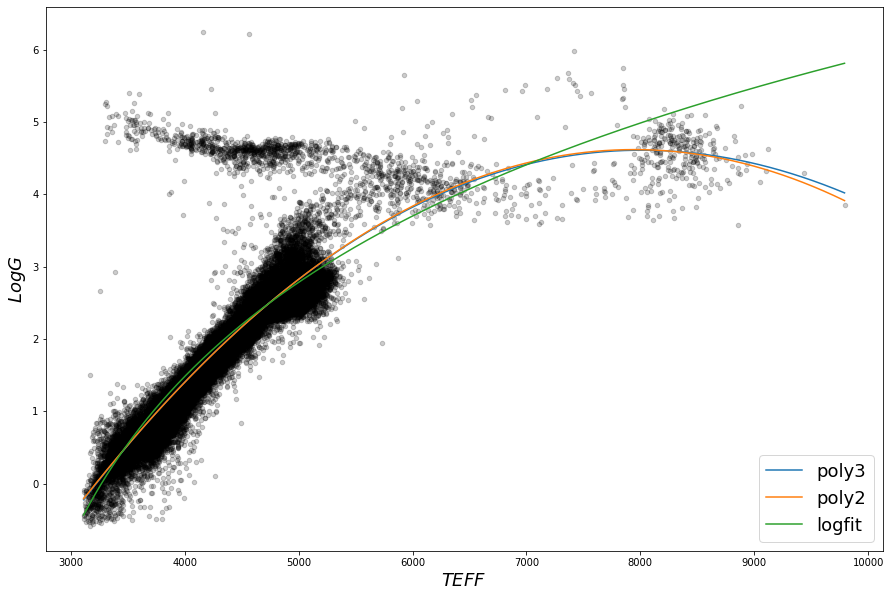

In [6]:
fig = plt.figure(figsize=(15,10))                                    
ax = fig.add_subplot(111)
ax.scatter(star_new['TEFF'], star_new['LogG'],s=20,c='black',zorder=2, alpha = 0.2)    # Plotting data

xfitted = np.linspace(X_sort[0],X_sort[len(X_sort) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, poly3(xfitted, np.mean(a), np.mean(b), np.mean(c), np.mean(d)), label = 'poly3')       # Plotting fit
ax.plot(xfitted, poly2(xfitted, np.mean(e), np.mean(f), np.mean(g)), label = 'poly2')
ax.plot(xfitted, logfit(xfitted, np.mean(i), np.mean(j), np.mean(k), np.mean(l)), label = 'logfit')

ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$LogG$', fontsize=18)


plt.legend(loc='best', fontsize=18)
plt.show()

(A) What are the best fit values of the parameters?
----

In [7]:
print("The best fit values are:\n a = {0}\n b = {1}\n c = {2}\n d = {3}".format(np.mean(a), np.mean(b), np.mean(c), np.mean(d)))

The best fit values are:
 a = 2.2966215942758032e-12
 b = -2.4524749662748325e-07
 c = 0.003487284577562843
 d = -8.768265320770283


(B) What function fits the data best?
---

poly3 appears to fit the data best. Although logfit has potential to be a better fit w some tweaks.

(C) Is there a second population? (Can you fit outliers w reasonable trend?)
---

In [8]:
#print(Y_sort)
#print(poly3(X_sort, np.mean(a), np.mean(b), np.mean(c), np.mean(d)))

#print(Y_sort - poly3(X_sort, np.mean(a), np.mean(b), np.mean(c), np.mean(d)))

3 sigma values are those with absolute value > 1.5166350030340254


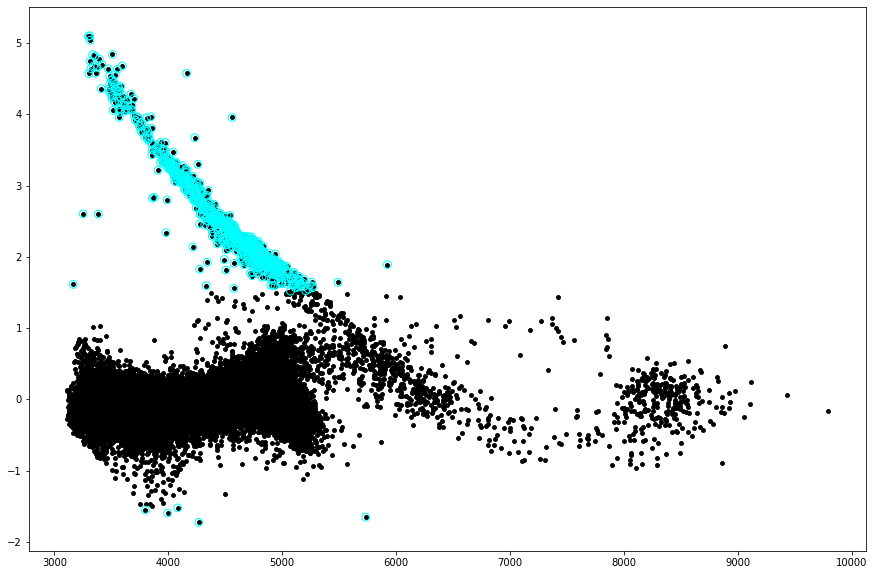

In [9]:
# Isolate Outliers
residual = Y_sort - poly3(X_sort,np.mean(a), np.mean(b), np.mean(c), np.mean(d))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X_sort,residual,s=15,c='black')

Tsigma = residual.mean() - 3 * residual.std(), residual.mean() + 3 * residual.std()
print("3 sigma values are those with absolute value > {}".format(Tsigma[1]))

outlier = np.absolute(residual) > Tsigma[1]
ax.scatter(X_sort[outlier],residual[outlier],s=60,edgecolor='cyan',facecolor='none')

plt.show()

0.91 seconds elapsed.


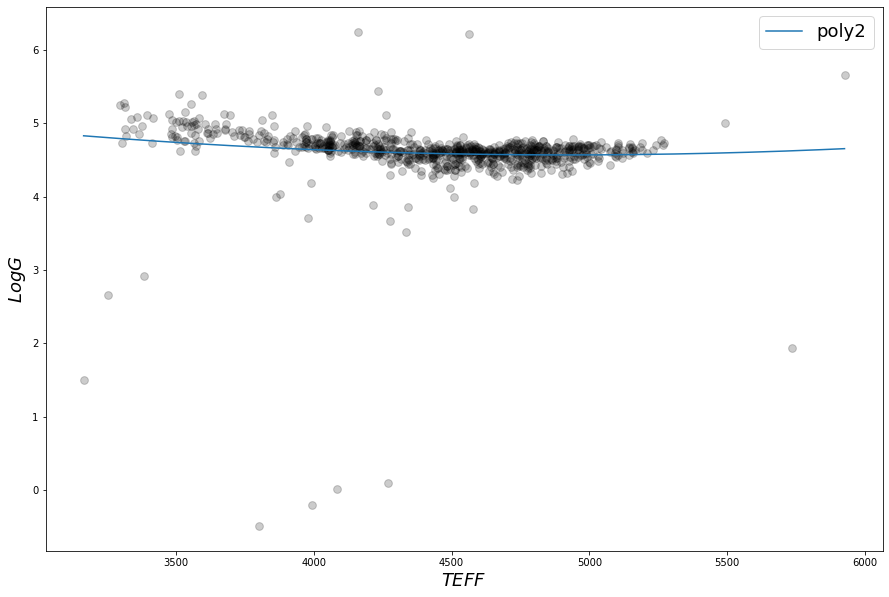

In [10]:
# Plot Outliers
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(X_sort[outlier],Y_sort[outlier],s=60,color='black',alpha = 0.2)

# Fit Outliers
i, j, k, l = mcFit(X_sort[outlier], Y_sort[outlier], Yerr_sort[outlier], poly2, Xerr_sort[outlier])

xfitted = np.linspace(X_sort[outlier][0],X_sort[outlier][len(X_sort[outlier]) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, poly2(xfitted, np.mean(i), np.mean(j), np.mean(k)), label = 'poly2')       # Plotting fit

ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$LogG$', fontsize=18)

plt.legend(loc='best', fontsize = 18)
plt.show()

In [11]:
print("Yes, there is a second population and it can be fit with poly2 function using parameters:\n a = {0}\n b = {1}\n c = {2} ".format(np.mean(i),np.mean(j),np.mean(k)))

Yes, there is a second population and it can be fit with poly2 function using parameters:
 a = 8.467431563764419e-08
 b = -0.0008333751297468733
 c = 6.621375354712307 


Fe_H, (Fe_H_ERR) vs. O_FE (O_FE_ERR) for [ GLAT < -10 or GLAT > 10 ]
===========================================================

In [12]:
star_new1 = star[(np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (np.absolute(star['GLAT']) > 10) & (star['Fe_H'] > -9999) & (star['O_FE'] > -9999)]

In [13]:
sorted_index = np.argsort(star_new1['Fe_H'])       # Sorting everything according to X values in order to comply w curve_fit
X_sort = star_new1['Fe_H'][sorted_index]
Y_sort = star_new1['O_FE'][sorted_index]
Yerr_sort = star_new1['O_FE_ERR'][sorted_index]
Xerr_sort = star_new1['Fe_H_ERR'][sorted_index]

#print(X_sort[0])
#print(X_sort[len(X_sort) - 1])

In [14]:
a, b, c, d = mcFit(X_sort, Y_sort, Yerr_sort, sigmoid, Xerr_sort, [-.3, 6, -.3,.2])

158.48 seconds elapsed.


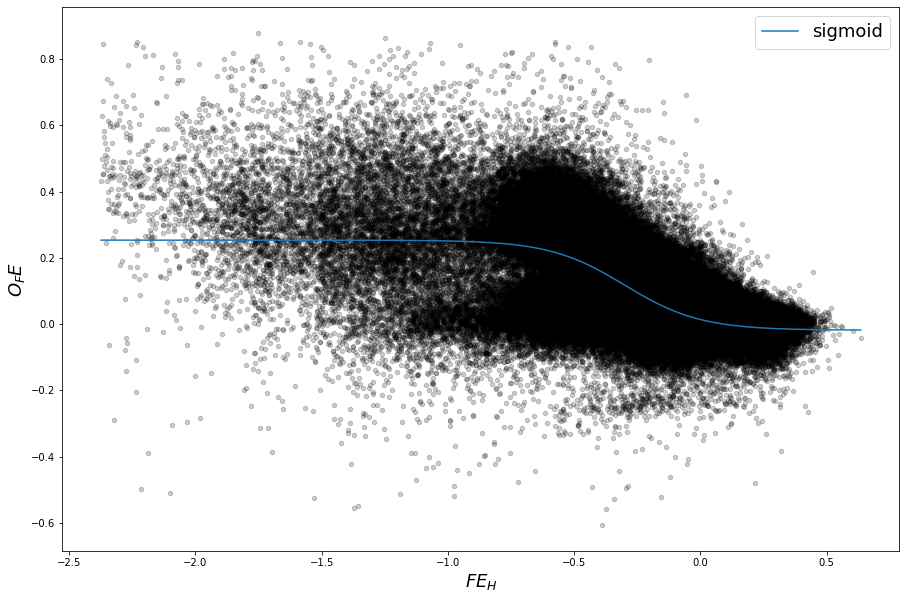

In [15]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star_new1['Fe_H'], star_new1['O_FE'],s=20,c='black',alpha = 0.2, zorder=2)

xfitted = np.linspace(X_sort[0],X_sort[len(X_sort) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, sigmoid(xfitted, np.mean(a), np.mean(b),np.mean(c), np.mean(d)), label = 'sigmoid')       # Plotting fit

ax.set_xlabel('$FE_H$', fontsize=18)
ax.set_ylabel('$O_FE$', fontsize=18)


plt.legend(loc='best', fontsize=18)
plt.show()

(A) What are the best fit values of the parameters?
----

In [16]:
print("The best fit values are:\n a = {0}\n b = {1}\n c = {2}\n d = {3}".format(np.mean(a), np.mean(b), np.mean(c), np.mean(d)))

The best fit values are:
 a = -0.29906535375521914
 b = 6.690138422849155
 c = -0.27200873941309567
 d = 0.2534947393422609


(B) What function fits the data best?
---

sigmoid appears to fit the data best

(C) Is there a second population? (Can you fit outliers w reasonable trend?)
---

3 sigma values are those with absolute value > 9.233352541923523


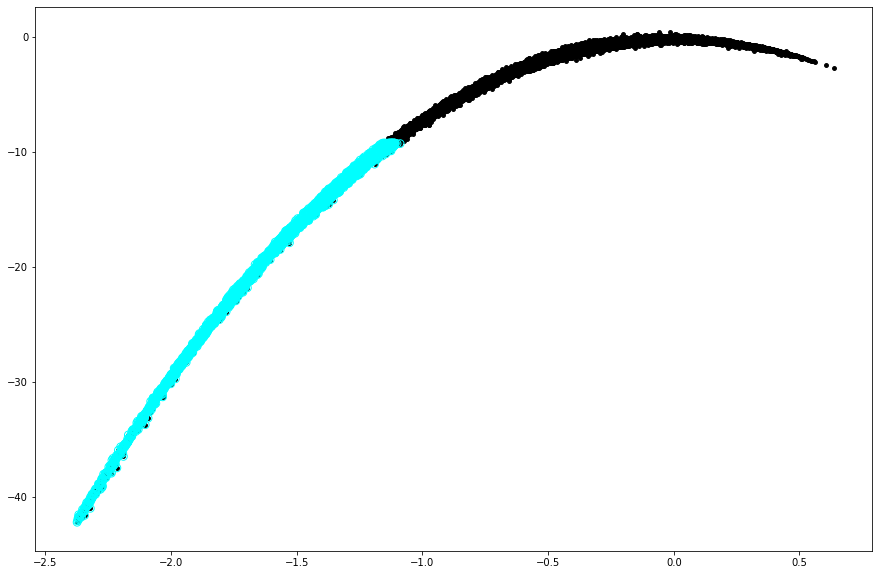

In [17]:
# Isolate Outliers
residual = Y_sort - poly3(X_sort,np.mean(a), np.mean(b), np.mean(c), np.mean(d))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X_sort,residual,s=15,c='black')

Tsigma = residual.mean() - 3 * residual.std(), residual.mean() + 3 * residual.std()
print("3 sigma values are those with absolute value > {}".format(Tsigma[1]))

outlier = np.absolute(residual) > Tsigma[1]
ax.scatter(X_sort[outlier],residual[outlier],s=60,edgecolor='cyan',facecolor='none')

plt.show()

1.80 seconds elapsed.


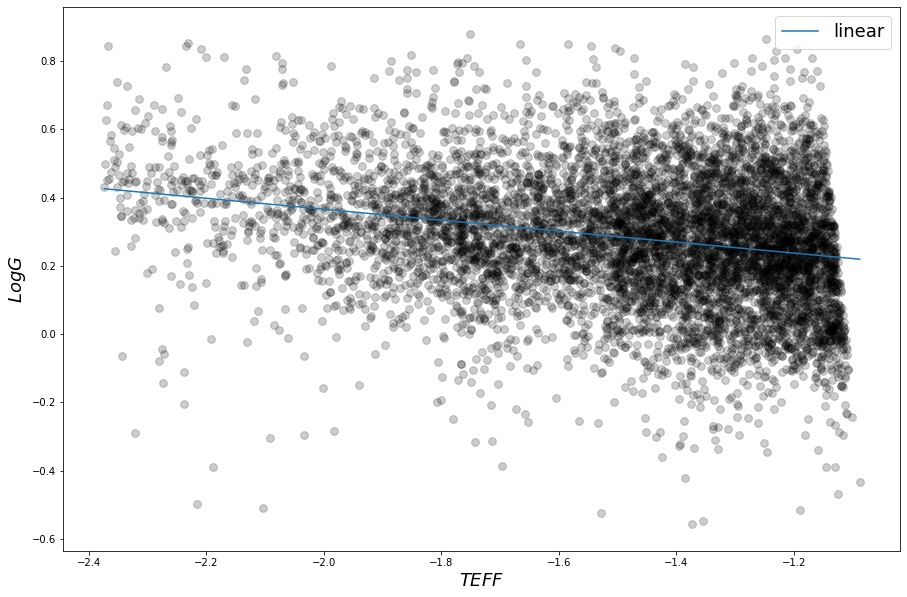

In [18]:
# Plot Outliers
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(X_sort[outlier],Y_sort[outlier],s=60,color='black',alpha = 0.2)

# Fit Outliers
i, j, k, l = mcFit(X_sort[outlier], Y_sort[outlier], Yerr_sort[outlier], linear, Xerr_sort[outlier])

xfitted = np.linspace(X_sort[outlier][0],X_sort[outlier][len(X_sort[outlier]) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, linear(xfitted, np.mean(i), np.mean(j)), label = 'linear')       # Plotting fit

ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$LogG$', fontsize=18)

plt.legend(loc='best', fontsize = 18)
plt.show()

In [19]:
print("Maybe, there is a second population and it can be reasonably fit with a linear function using parameters:\n slope = {0}\n y-intercept = {1}".format(np.mean(i),np.mean(j)))

Maybe, there is a second population and it can be reasonably fit with a linear function using parameters:
 slope = -0.1606773317825553
 y-intercept = 0.04449200421933598


Fe_H, (Fe_H_ERR) vs. O_FE (O_FE_ERR) for [ -2 < GLAT < 2 ]
=============

In [20]:
star_new2 = star[(np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['GLAT'] > -2) & (star['GLAT'] < 2) & (star['Fe_H'] > -9999) & (star['O_FE'] > -9999)]

In [21]:
sorted_index = np.argsort(star_new2['Fe_H'])       # Sorting everything according to X values in order to comply w curve_fit
X_sort = star_new2['Fe_H'][sorted_index]
Y_sort = star_new2['O_FE'][sorted_index]
Yerr_sort = star_new2['O_FE_ERR'][sorted_index]
Xerr_sort = star_new2['Fe_H_ERR'][sorted_index]

In [22]:
a, b, c, d = mcFit(X_sort, Y_sort, Yerr_sort, sigmoid, Xerr_sort, guess =[-0.29, 6.72,-0.27, 0.25] )

26.63 seconds elapsed.


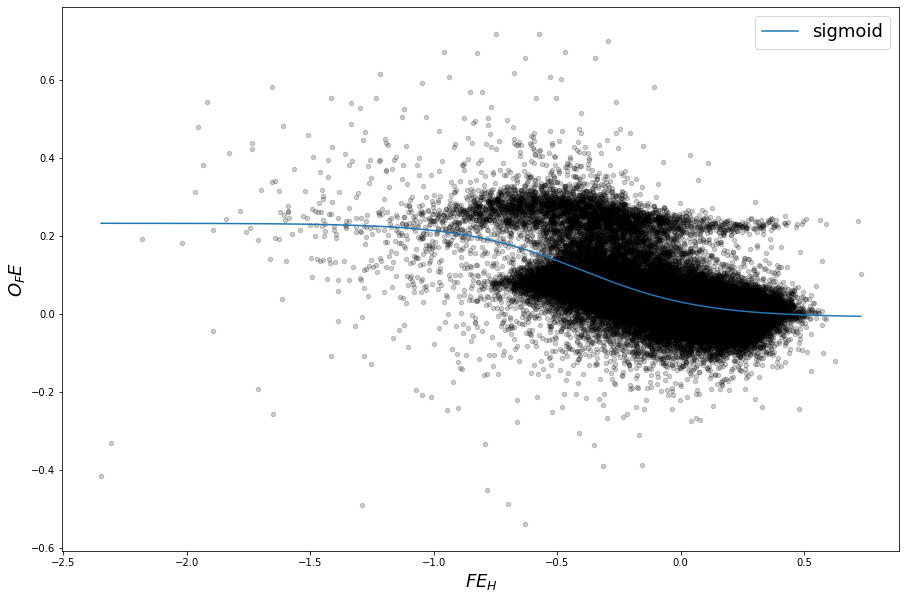

In [23]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star_new2['Fe_H'], star_new2['O_FE'],s=20,c='black',alpha = 0.2, zorder=2)

xfitted = np.linspace(X_sort[0],X_sort[len(X_sort) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, sigmoid(xfitted, np.mean(a), np.mean(b), np.mean(c), np.mean(d)), label = 'sigmoid')       # Plotting fit

ax.set_xlabel('$FE_H$', fontsize=18)
ax.set_ylabel('$O_FE$', fontsize=18)


plt.legend(loc='best', fontsize=18)
plt.show()

(A) What are the best fit values of the parameters?
----

In [24]:
print("The best fit values are:\n a = {0}\n b = {1}\n c = {2}\n d = {3}".format(np.mean(a), np.mean(b), np.mean(c), np.mean(d)))

The best fit values are:
 a = -0.3999373947583586
 b = 4.122104478441964
 c = -0.2403761036461219
 d = 0.23242061934963038


(B) What function fits the data best?
---

sigmoid appears to fit the data best

(C) Is there a second population? (Can you fit outliers w reasonable trend?)
---

3 sigma values are those with absolute value > 2.1979424357414246


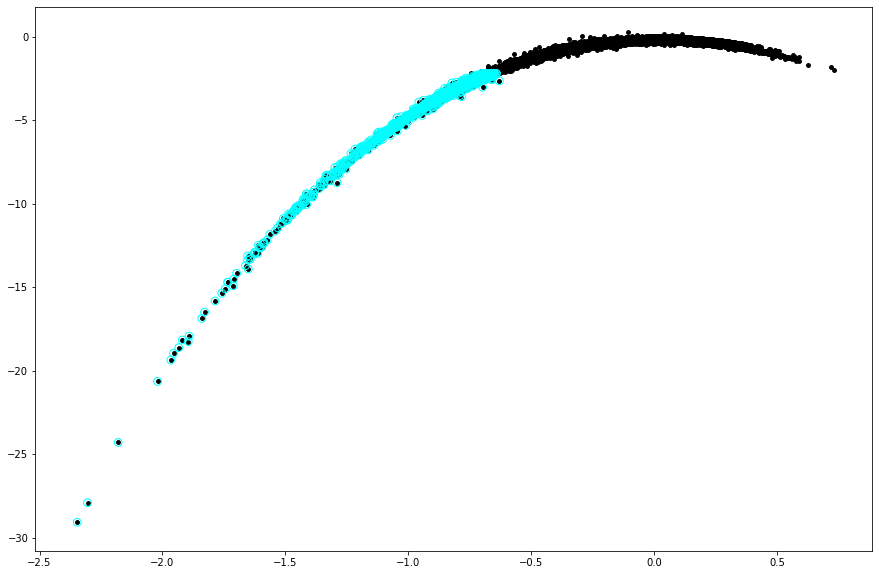

In [25]:
# Isolate Outliers
residual = Y_sort - poly3(X_sort,np.mean(a), np.mean(b), np.mean(c), np.mean(d))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X_sort,residual,s=15,c='black')

Tsigma = residual.mean() - 3 * residual.std(), residual.mean() + 3 * residual.std()
print("3 sigma values are those with absolute value > {}".format(Tsigma[1]))

outlier = np.absolute(residual) > Tsigma[1]
ax.scatter(X_sort[outlier],residual[outlier],s=60,edgecolor='cyan',facecolor='none')

plt.show()

0.90 seconds elapsed.


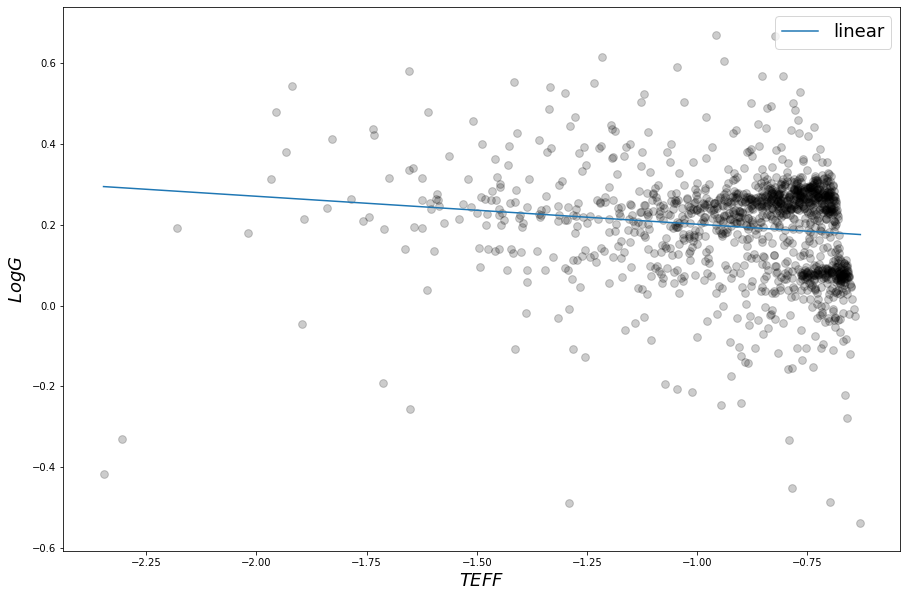

In [26]:
# Plot Outliers
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(X_sort[outlier],Y_sort[outlier],s=60,color='black',alpha = 0.2)

# Fit Outliers
i, j, k, l = mcFit(X_sort[outlier], Y_sort[outlier], Yerr_sort[outlier], linear, Xerr_sort[outlier])

xfitted = np.linspace(X_sort[outlier][0],X_sort[outlier][len(X_sort[outlier]) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, linear(xfitted, np.mean(i), np.mean(j)), label = 'linear')       # Plotting fit

ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$LogG$', fontsize=18)

plt.legend(loc='best', fontsize = 18)
plt.show()

In [27]:
print("Maybe, there is a second population and it can be reasonably fit with a linear function using parameters:\n slope = {0}\n y-intercept = {1}".format(np.mean(i),np.mean(j)))

Maybe, there is a second population and it can be reasonably fit with a linear function using parameters:
 slope = -0.06919388891663789
 y-intercept = 0.13270963591158733


TEFF, (TEFF_ERR) v (J - K) (J_ERR, K_ERR) for [ GLAT < -10 or GLAT > 10 ]
=======

In [28]:
star_new3 = star[(np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (np.absolute(star['GLAT']) > 10) & (star['TEFF'] > -9999) & ((star['J'] - star['K']) < 9999) & ((star['J'] - star['K']) > -9999)]

In [29]:
sorted_index = np.argsort(star_new3['TEFF'])       # Sorting everything according to X values in order to comply w curve_fit
X_sort = star_new3['TEFF'][sorted_index]
Y_sort = star_new3['J'][sorted_index] - star_new3['K'][sorted_index]
Yerr_sort = np.sqrt(star_new3['J_ERR']**2 + star_new3['K_ERR']**2)[sorted_index]
Xerr_sort = star_new3['TEFF_ERR'][sorted_index]

In [30]:
a, b, c, d = mcFit(X_sort, Y_sort, Yerr_sort, poly2, Xerr_sort)
e, f, g, h = mcFit(X_sort, Y_sort, Yerr_sort, linear, Xerr_sort)

92.54 seconds elapsed.
61.45 seconds elapsed.


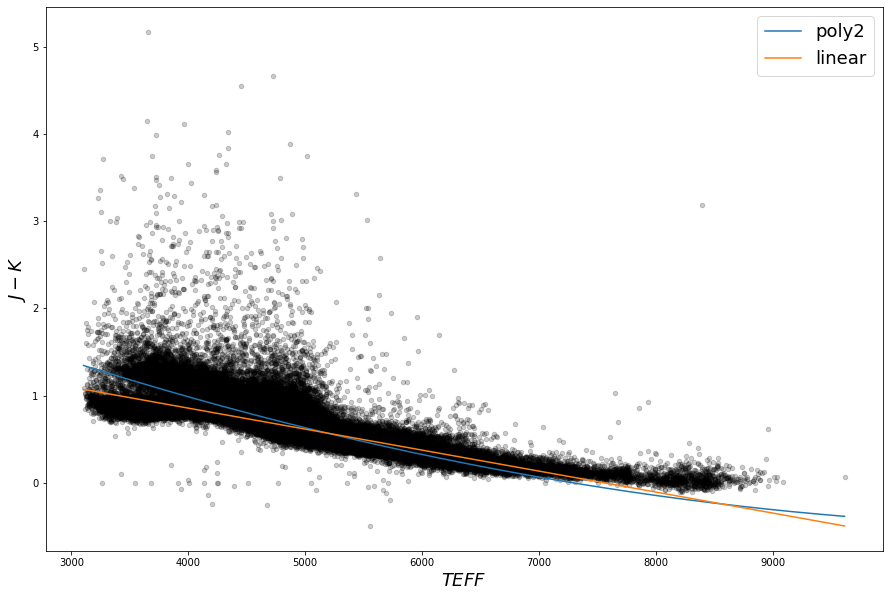

In [31]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star_new3['TEFF'], star_new3['J'] - star_new3['K'],s=20,c='black',alpha = 0.2, zorder=2)

xfitted = np.linspace(X_sort[0],X_sort[len(X_sort) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, poly2(xfitted, np.mean(a), np.mean(b), np.mean(c)), label = 'poly2')       # Plotting fit
ax.plot(xfitted, linear(xfitted, np.mean(e), np.mean(f)), label = 'linear')

ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$J - K$', fontsize=18)


plt.legend(loc='best', fontsize=18)
plt.show()

(A) What are the best fit values of the parameters?
----

In [32]:
print("The best fit values are:\n a = {0}\n b = {1}".format(np.mean(e), np.mean(f)))

The best fit values are:
 a = -0.00024094208104909827
 b = 1.8189421227688272


(B) What function fits the data best?
---

linear appears to fit the data best

(C) Is there a second population? (Can you fit outliers w reasonable trend?)
---

3 sigma values are those with absolute value > 0.3945006588473916


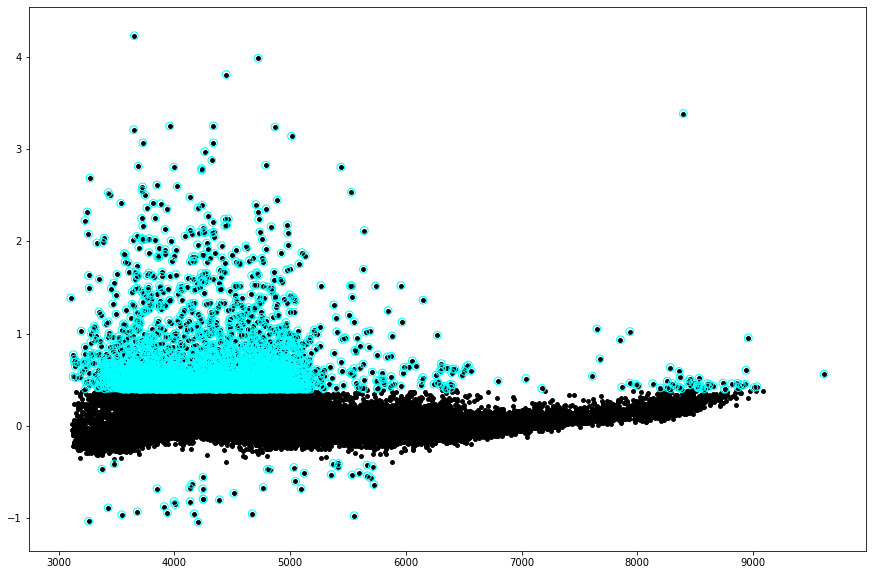

In [33]:
# Isolate Outliers
residual = Y_sort - linear(X_sort,np.mean(e), np.mean(f))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X_sort,residual,s=15,c='black')

Tsigma = residual.mean() - 3 * residual.std(), residual.mean() + 3 * residual.std()
print("3 sigma values are those with absolute value > {}".format(Tsigma[1]))

outlier = np.absolute(residual) > Tsigma[1]
ax.scatter(X_sort[outlier],residual[outlier],s=60,edgecolor='cyan',facecolor='none')

plt.show()

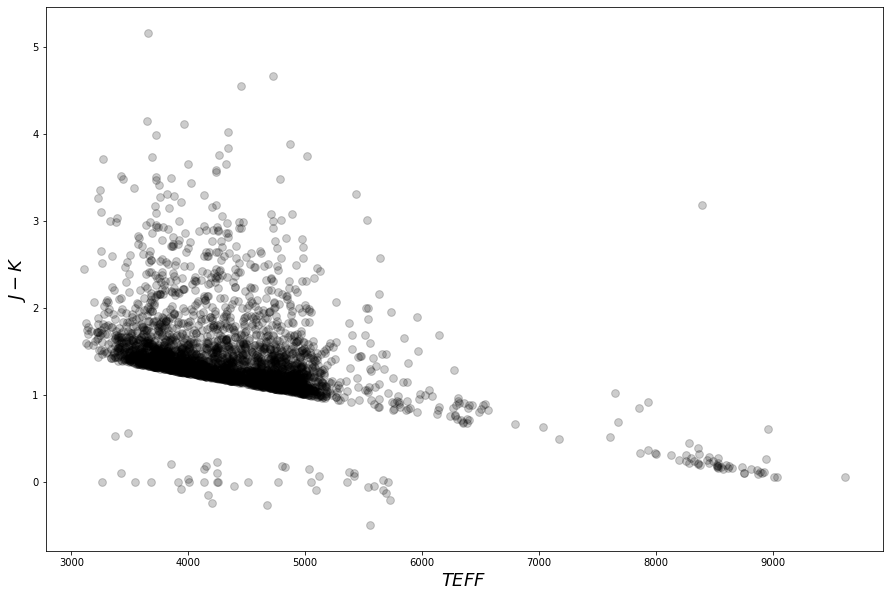

In [34]:
# Plot Outliers
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(X_sort[outlier],Y_sort[outlier],s=60,color='black',alpha = 0.2)

# Fit Outliers
#i, j, k, l = mcFit(X_sort[outlier], Y_sort[outlier], Yerr_sort[outlier], linear, Xerr_sort[outlier])

#xfitted = np.linspace(X_sort[outlier][0],X_sort[outlier][len(X_sort[outlier]) -1],10000,endpoint=True)            #Creating linspace for fitted X data
#ax.plot(xfitted, linear(xfitted, np.mean(i), np.mean(j)), label = 'linear')       # Plotting fit

ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$J - K$', fontsize=18)

#plt.legend(loc='best', fontsize = 18)
plt.show()

No, there is not a distinct second population
--------

GLON vs. VHELIO_AVG (VERR) for [ -10 < GLAT < 10 ]
=========

In [35]:
star_new4 = star[(np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['GLAT'] > -10) & (star['GLAT'] < 10) & (star['GLON'] > -9999) & (star['VHELIO_AVG'] < 9999) & (star['VHELIO_AVG'] > -9999)]

In [36]:
sorted_index = np.argsort(star_new4['GLON'])       # Sorting everything according to X values in order to comply w curve_fit
X_sort = star_new4['GLON'][sorted_index]
Y_sort = star_new4['VHELIO_AVG'][sorted_index]
Yerr_sort = star_new4['VERR'][sorted_index]

In [37]:
a, b, c, d = mcFit(X_sort, Y_sort, Yerr_sort, cosfit, guess = [50,0.025,.7,1])

133.38 seconds elapsed.


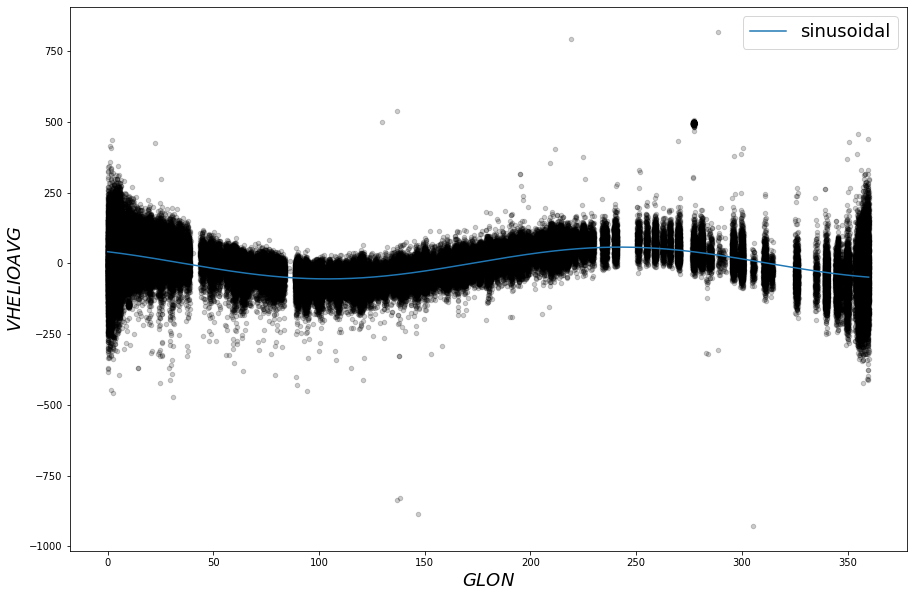

In [38]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star_new4['GLON'], star_new4['VHELIO_AVG'],s=20,c='black',alpha = 0.2, zorder=2)

xfitted = np.linspace(X_sort[0],X_sort[len(X_sort) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, cosfit(xfitted, np.mean(a), np.mean(b), np.mean(c), np.mean(d)), label = 'sinusoidal')       # Plotting fit

ax.set_xlabel('$GLON$', fontsize=18)
ax.set_ylabel('$VHELIO AVG$', fontsize=18)


plt.legend(loc = 'best', fontsize = 18)
plt.show()

(A) What are the best fit values of the parameters?
----

In [39]:
print("The best fit values are:\n a = {0}\n b = {1}\n c = {2}\n d = {3}".format(np.mean(a), np.mean(b), np.mean(c), np.mean(d)))

The best fit values are:
 a = 56.152806244120974
 b = 0.022694796051465977
 c = 0.781259009529113
 d = 1.2345526062506904


(B) What function fits the data best?
---

cosfit appears to fit the data best

(C) Is there a second population? (Can you fit outliers w reasonable trend?)
---

3 sigma values are those with absolute value > 183.9214210872066


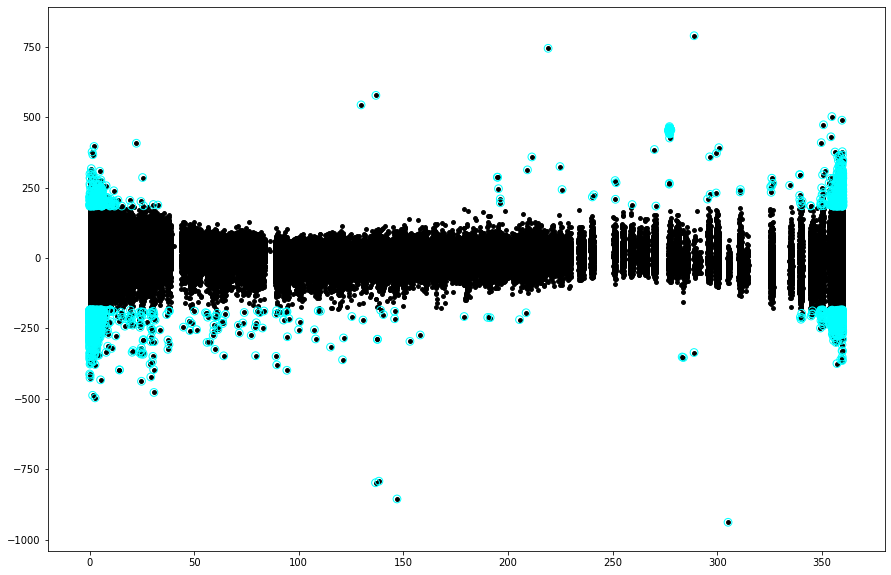

In [40]:
# Isolate Outliers
residual = Y_sort - cosfit(X_sort,np.mean(a), np.mean(b), np.mean(c), np.mean(d))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X_sort,residual,s=15,c='black')

Tsigma = residual.mean() - 3 * residual.std(), residual.mean() + 3 * residual.std()
print("3 sigma values are those with absolute value > {}".format(Tsigma[1]))

outlier = np.absolute(residual) > Tsigma[1]
ax.scatter(X_sort[outlier],residual[outlier],s=60,edgecolor='cyan',facecolor='none')

plt.show()

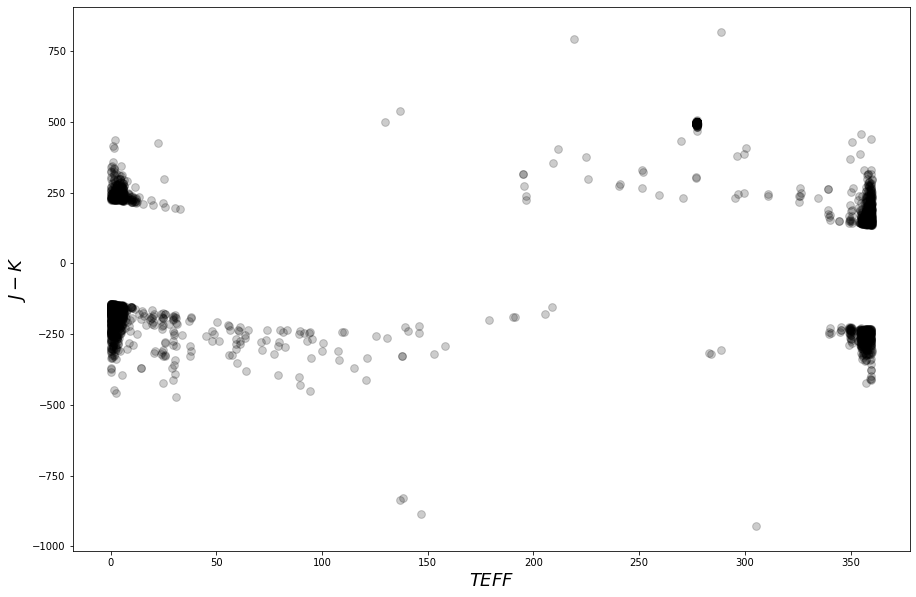

In [41]:
# Plot Outliers
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(X_sort[outlier],Y_sort[outlier],s=60,color='black',alpha = 0.2)

# Fit Outliers
#i, j, k, l = mcFit(X_sort[outlier], Y_sort[outlier], Yerr_sort[outlier], linear, Xerr_sort[outlier])

#xfitted = np.linspace(X_sort[outlier][0],X_sort[outlier][len(X_sort[outlier]) -1],10000,endpoint=True)            #Creating linspace for fitted X data
#ax.plot(xfitted, linear(xfitted, np.mean(i), np.mean(j)), label = 'linear')       # Plotting fit

ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$J - K$', fontsize=18)

#plt.legend(loc='best', fontsize = 18)
plt.show()

No, there is not a distinct second population
--------

NVISITS vs. VSCATTER (VERR) for [ NVISITS >= 1 ]
=======

In [42]:
star_new5 = star[(np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['NVISITS'] >= 1)]

In [43]:
sorted_index = np.argsort(star_new5['NVISITS'])       # Sorting everything according to X values in order to comply w curve_fit
X_sort = star_new5['NVISITS'][sorted_index]
Y_sort = star_new5['VSCATTER'][sorted_index]
Yerr_sort = star_new5['VERR'][sorted_index]

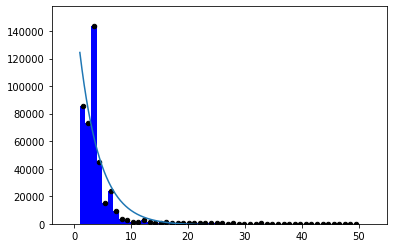

In [44]:
(histData, edges, patches) = plt.hist(X_sort, bins=50, color="blue", label="data counts")

xmin = edges[0]
xmax = edges[-1]
xrange = xmax - xmin
ymin = 0.0
ymax = histData.max()
yrange = ymax - ymin

plt.xlim(xmin - 0.1 * xrange, xmax + 0.1 * xrange)
plt.ylim(ymin, ymax + 0.1 * yrange)

xdata = []
for i in range(len(edges)-1):
    x = (edges[i] + edges[i+1]) / 2
    xdata.append(x)

plt.scatter(xdata, histData, 20, color="black", zorder=2, label="midpoints")
xfitted = np.linspace(1, 50,5000)
params, other = opt.curve_fit(exponential, xdata, histData, [1,-1,1,1])
plt.plot(xfitted, exponential(xfitted, *params))

In [45]:
a, b, c, d = mcFit(X_sort, Y_sort, Yerr_sort, linear, guess = [-1,50])
e,f,g,h = mcFit(X_sort, Y_sort, Yerr_sort, poly2)

99.94 seconds elapsed.
302.28 seconds elapsed.


In [46]:
i,j,k,l = mcFit(X_sort, Y_sort, Yerr_sort,exponential, guess = [1,-1,1,1])

C:\Users\dusti\Anaconda\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


638.45 seconds elapsed.


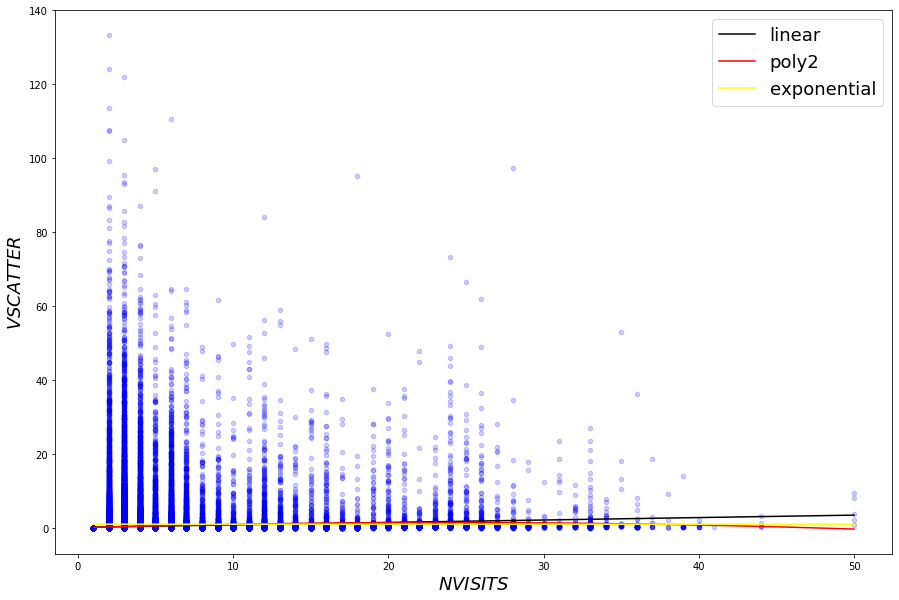

In [47]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(star_new5['NVISITS'], star_new5['VSCATTER'],s=20,c='blue',alpha = 0.2, zorder=2)

xfitted = np.linspace(X_sort[0],X_sort[len(X_sort) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, linear(xfitted, np.mean(a), np.mean(b)), c = 'black', label = 'linear')       # Plotting fit
ax.plot(xfitted, poly2(xfitted, np.mean(e), np.mean(f), np.mean(g)), c = 'red', label = 'poly2')
ax.plot(xfitted, exponential(xfitted, np.mean(i), np.mean(j), np.mean(k), np.mean(l)), c = 'yellow', label ='exponential')

ax.set_xlabel('$NVISITS$', fontsize=18)
ax.set_ylabel('$VSCATTER$', fontsize=18)


plt.legend(loc = 'best', fontsize = 18)
plt.show()

(A) What are the best fit values of the parameters?
----

In [49]:
print("The best fit values are:\n a = {0}\n b = {1}".format(np.mean(a), np.mean(b)))

The best fit values are:
 a = 0.06598911513754106
 b = 0.16151342955431067


(B) What function fits the data best?
---

linear appears to fit the data best

(C) Is there a second population? (Can you fit outliers w reasonable trend?)
---

3 sigma values are those with absolute value > 7.397017868743504


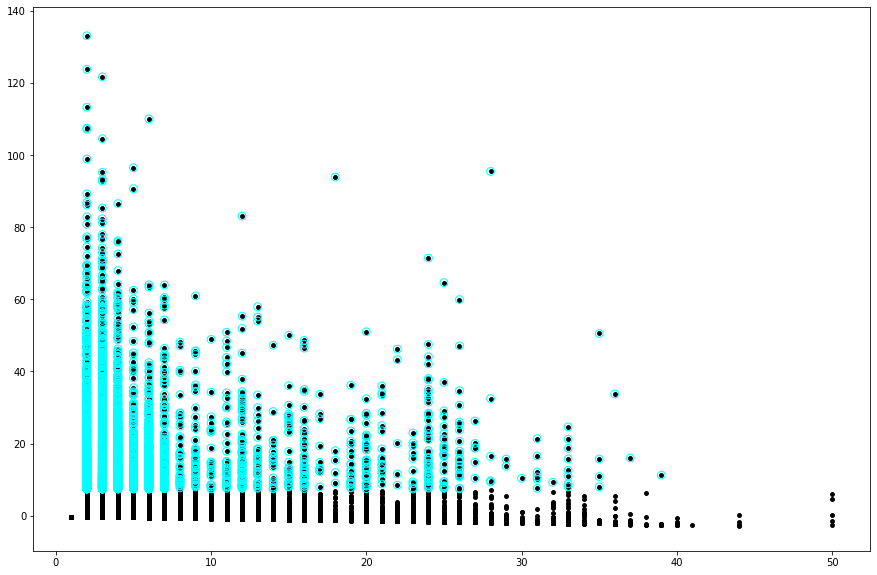

In [50]:
# Isolate Outliers
residual = Y_sort - linear(X_sort,np.mean(a), np.mean(b))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X_sort,residual,s=15,c='black')

Tsigma = residual.mean() - 3 * residual.std(), residual.mean() + 3 * residual.std()
print("3 sigma values are those with absolute value > {}".format(Tsigma[1]))

outlier = np.absolute(residual) > Tsigma[1]
ax.scatter(X_sort[outlier],residual[outlier],s=60,edgecolor='cyan',facecolor='none')

plt.show()

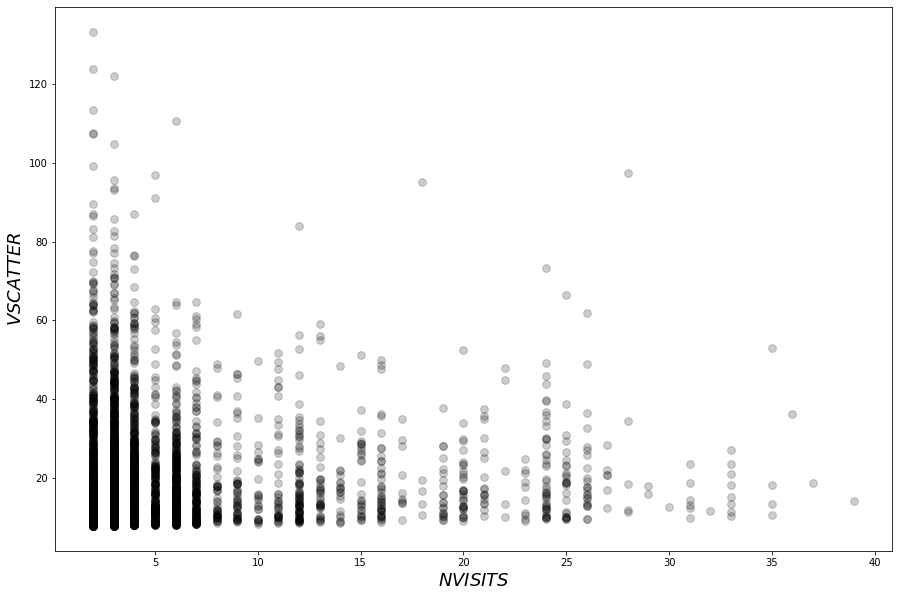

In [51]:
# Plot Outliers
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(X_sort[outlier],Y_sort[outlier],s=60,color='black',alpha = 0.2)

# Fit Outliers
#i, j, k, l = mcFit(X_sort[outlier], Y_sort[outlier], Yerr_sort[outlier], linear, guess =[-1,50])

#xfitted = np.linspace(X_sort[outlier][0],X_sort[outlier][len(X_sort[outlier]) -1],10000,endpoint=True)            #Creating linspace for fitted X data
#ax.plot(xfitted, linear(xfitted, np.mean(i), np.mean(j)), label = 'linear')       # Plotting fit

ax.set_xlabel('$NVISITS$', fontsize=18)
ax.set_ylabel('$VSCATTER$', fontsize=18)

#plt.legend(loc='best', fontsize = 18)
plt.show()

No, there is not a distinct second population
--------

Fe_H, (Fe_H_ERR) vs. NI_FE (NI_FE_ERR)
====

In [52]:
star_new6 = star[(np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['NI_FE'] > -9999)]

In [53]:
sorted_index = np.argsort(star_new6['Fe_H'])       # Sorting everything according to X values in order to comply w curve_fit
X_sort = star_new6['Fe_H'][sorted_index]
Y_sort = star_new6['NI_FE'][sorted_index]
Yerr_sort = star_new6['NI_FE_ERR'][sorted_index]
Xerr_sort = star_new6['Fe_H_ERR'][sorted_index]

In [54]:
a, b, c, d = mcFit(X_sort, Y_sort, Yerr_sort, linear, Xerr_sort, guess=[0,0])
e, f, g, h = mcFit(X_sort, Y_sort, Yerr_sort, poly2, Xerr_sort)

87.34 seconds elapsed.
143.98 seconds elapsed.


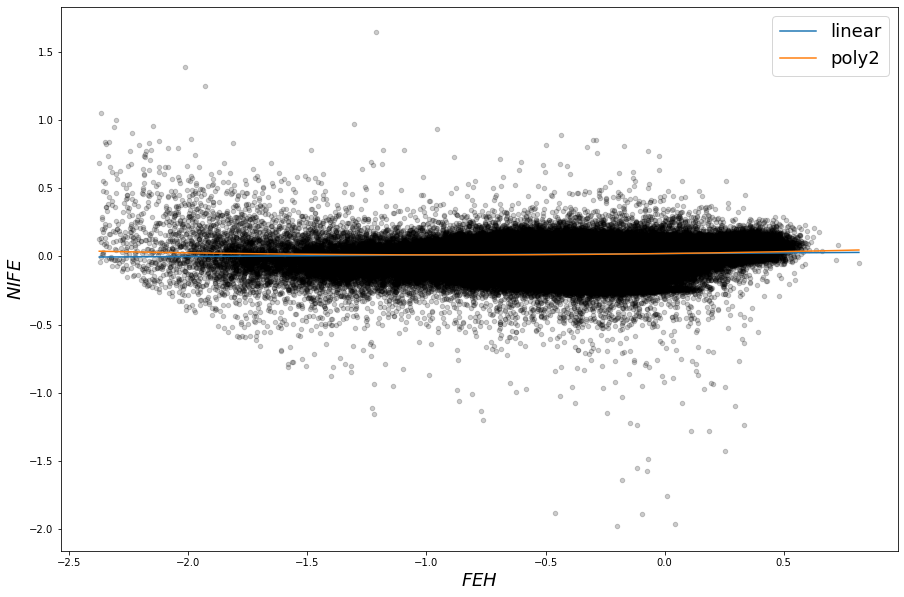

In [55]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star_new6['Fe_H'], star_new6['NI_FE'],s=20,c='black',alpha = 0.2, zorder=2)

xfitted = np.linspace(X_sort[0],X_sort[len(X_sort) -1],10000,endpoint=True)            #Creating linspace for fitted X data
ax.plot(xfitted, linear(xfitted, np.mean(a), np.mean(b)), label = 'linear')       # Plotting fit
ax.plot(xfitted, poly2(xfitted, np.mean(e), np.mean(f), np.mean(g)), label = 'poly2')


ax.set_xlabel('$FE H$', fontsize=18)
ax.set_ylabel('$NI FE$', fontsize=18)


plt.legend(loc='best', fontsize = 18)
plt.show()

(A) What are the best fit values of the parameters?
----

In [56]:
print("The best fit values are:\n a = {0}\n b = {1}\n c = {2}".format(np.mean(e), np.mean(f), np.mean(g)))

The best fit values are:
 a = 0.01225242667797902
 b = 0.02193318781064449
 c = 0.021627809164495318


(B) What function fits the data best?
---

poly2 appears to fit the data best

(C) Is there a second population? (Can you fit outliers w reasonable trend?)
---

3 sigma values are those with absolute value > 0.20860483208832648


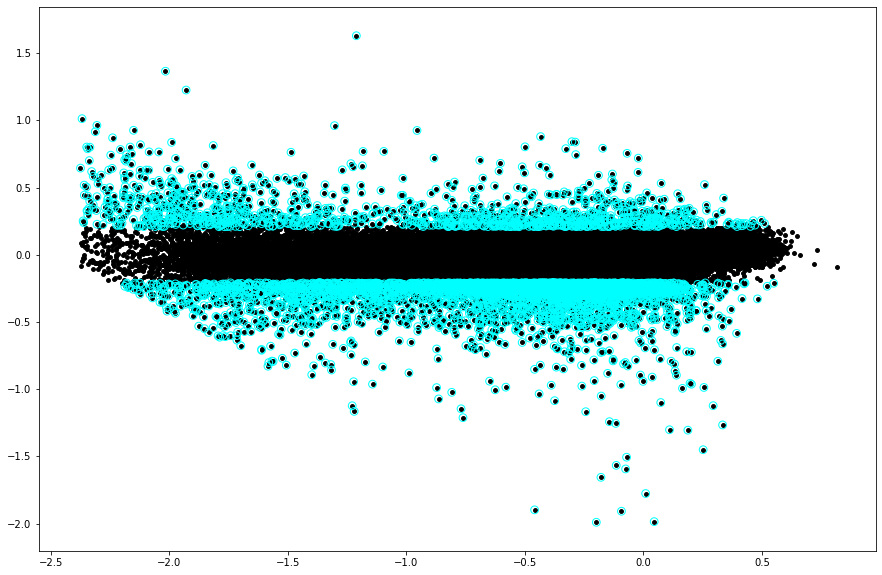

In [57]:
# Isolate Outliers
residual = Y_sort - poly2(X_sort,np.mean(e), np.mean(f), np.mean(g))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X_sort,residual,s=15,c='black')

Tsigma = residual.mean() - 3 * residual.std(), residual.mean() + 3 * residual.std()
print("3 sigma values are those with absolute value > {}".format(Tsigma[1]))

outlier = np.absolute(residual) > Tsigma[1]
ax.scatter(X_sort[outlier],residual[outlier],s=60,edgecolor='cyan',facecolor='none')

plt.show()

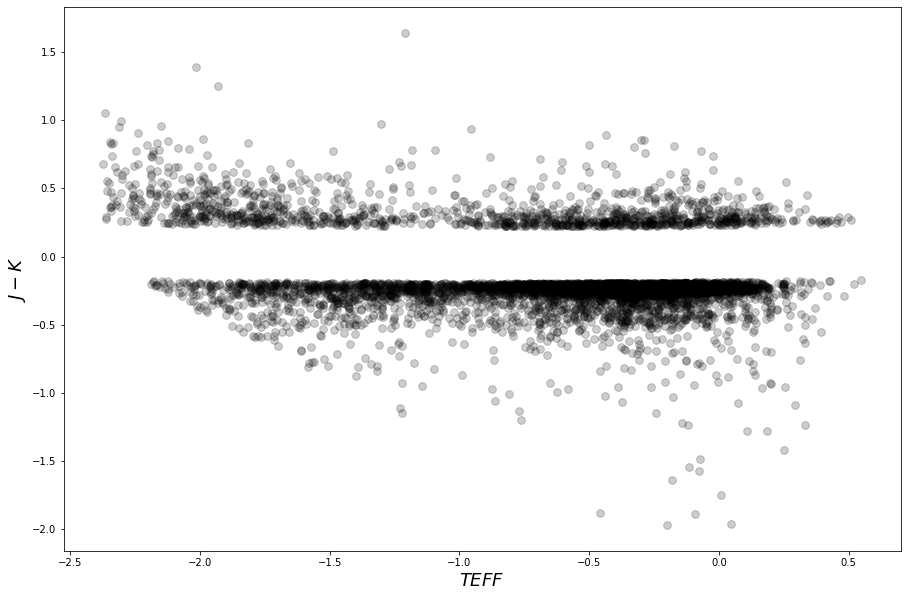

In [58]:
# Plot Outliers
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(X_sort[outlier],Y_sort[outlier],s=60,color='black',alpha = 0.2)

# Fit Outliers
#i, j, k, l = mcFit(X_sort[outlier], Y_sort[outlier], Yerr_sort[outlier], linear, Xerr_sort[outlier])

#xfitted = np.linspace(X_sort[outlier][0],X_sort[outlier][len(X_sort[outlier]) -1],10000,endpoint=True)            #Creating linspace for fitted X data
#ax.plot(xfitted, linear(xfitted, np.mean(i), np.mean(j)), label = 'linear')       # Plotting fit

ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$J - K$', fontsize=18)

#plt.legend(loc='best', fontsize = 18)
plt.show()

No, there is not a distinct second population
--------